In [1]:
!pip install nltk
!pip install textract
!pip install pdf2docx
!pip install -U spacy
!pip install pdf2docx
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=e8785ad3cb7f8fdff45196a9b7e28c2915a81bec936f9f34ada5ebaff92ce115
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=01948c341085d291433d13996714bc5d48368a67fad61b8578150894ee9e3c29
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built fire python-docx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Import Library**

In [2]:
import os #for interaction with operating system
import re #use for regular expression
import nltk #for text preprocessing purpose
import spacy #it uses for documentation
import textract
import pdf2docx
import string
import pandas as pd
import numpy as np
import seaborn as sns #for graps

import nltk
nltk.download("stopwords")
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer #for tokenization
from wordcloud import wordcloud,STOPWORDS #for stopwords removel
from nltk.stem import PorterStemmer,WordNetLemmatizer #for stemming and lemmitization purpose
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #word count

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.pylab  as pylab


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **import all Resume File**

In [3]:
!git clone https://github.com/Himanshupatil9723/Dataset.git


Cloning into 'Dataset'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 138 (delta 0), reused 2 (delta 0), pack-reused 135
Receiving objects: 100% (138/138), 6.38 MiB | 9.88 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [4]:
os.listdir("/content/Dataset/Resumes")

['workday resumes',
 'SQL Developer Lightning insight',
 'React Developer',
 'Peoplesoft resumes']

# **Extract The Text From Dataset**

In [5]:
#create filepath and category for peoplesoft resume folder
file_path1 = []
category1 = []
directory1 = '/content/Dataset/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
  if i.endswith(".docx"):
    os.path.join(directory1,i)
    file_path1.append((textract.process(os.path.join(directory1,i))).decode("utf-8"))
    category1.append("PeopleSoft")

In [6]:
#create dataset for PeopleSoft Resume Folder
data1 = pd.DataFrame(data = file_path1,columns = ["Raw_Details"])
data1["Category1"] = category1
data1

Raw_Details   Category1
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft
1   Classification: Internal\n\nClassification: In...  PeopleSoft
2   Vinod Akkala                                  ...  PeopleSoft
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft
4   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft
5   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft
6   Personal Details\t\t\n\n\n\nName\n\nPritam Bis...  PeopleSoft
7   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
8   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
9   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft
10  Rahul Ahuja\n\n-------------------------------...  PeopleSoft
11  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  PeopleSoft
12  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  PeopleSoft
13  Hari Narayana \t\t              \n\n\t\n\n\n\n...  PeopleSoft
14  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  PeopleSoft
15  R Ahmed                                       ...  PeopleSoft
16  PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...  PeopleSoft
17  PeopleSoft Database Administrator\n\n         ...  PeopleSoft
18  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  PeopleSoft
19  PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft

In [7]:
from pdf2docx import Converter

path_input = '/content/Dataset/Resumes/React Developer'
path_output = '/content/Dataset/Resumes/React Developer'


#convert pdf file to .**docx**

In [8]:
#convert pdf file to .docx
for file in os.listdir(path_input):
    if file.endswith('.pdf'):
        final = os.path.join(path_input, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path_output + '/' + basename+'.docx', start=0, end=None)
        cv.close()

Reactjs Developer_Prabakaran_Musquare Technologies


In [9]:
#create filepath and category for React Developer folder
file_path2 = []
category2 = []
directory2 = '/content/Dataset/Resumes/React Developer'
for i in os.listdir(directory2):
  if i.endswith(".docx"):
    os.path.join(directory2,i)
    file_path2.append((textract.process(os.path.join(directory2,i))).decode("utf-8"))
    category2.append("React Developer")

In [10]:
#create dataset for React Developer Folder
data2 = pd.DataFrame(data = file_path2,columns = ["Raw_Details"])
data2["Category2"] = category2
data2

Raw_Details        Category2
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React Developer
1   Venkatalakshmi Pedireddy\n\nSoftware Developer...  React Developer
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React Developer
3   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React Developer
4   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React Developer
5   HARIPRIYA BATTINA \n\nExperience as UI Develop...  React Developer
6   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React Developer
7   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React Developer
8   Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React Developer
9   CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...  React Developer
10  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React Developer
11  Name: Ravali P \n\n\n\n                       ...  React Developer
12  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React Developer
13  Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...  React Developer
14  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React Developer
15  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React Developer
16  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React Developer
17  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React Developer
18  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React Developer
19  FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...  React Developer
20  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React Developer
21  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React Developer
22  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React Developer
23  Name: M. Prabakaran \nTitle: UI Developer\n\nP...  React Developer

In [11]:
#create filepath and category for SQL Developer Lightning insight folder
file_path3 = []
category3 = []
directory3 = '/content/Dataset/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory3):
  if i.endswith(".docx"):
    os.path.join(directory3,i)
    file_path3.append((textract.process(os.path.join(directory3,i))).decode("utf-8"))
    category3.append("SQL Developer Lightning insight")

In [12]:
#create dataset for SQL Developer Lightning insight Folder
data3 = pd.DataFrame(data = file_path3,columns = ["Raw_Details"])
data3["Category3"] = category3
data3

Raw_Details  \
0   BUDDHA VAMSI                                  ...   
1   RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
2   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
3   Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
4   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
5   Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
6   Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
7   resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
8   SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   
9   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
10  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
11  KAMBALLA PRADEEP                              ...   
12   Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
13  SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   

                          Category3  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning insight  
6   SQL Developer Lightning insight  
7   SQL Developer Lightning insight  
8   SQL Developer Lightning insight  
9   SQL Developer Lightning insight  
10  SQL Developer Lightning insight  
11  SQL Developer Lightning insight  
12  SQL Developer Lightning insight  
13  SQL Developer Lightning insight

In [13]:
#create filepath and category for workday resumes folder
file_path4 = []
category4 = []
directory4 = '/content/Dataset/Resumes/workday resumes'
for i in os.listdir(directory4):
  if i.endswith(".docx"):
    os.path.join(directory4,i)
    file_path4.append((textract.process(os.path.join(directory4,i))).decode("utf-8"))
    category4.append("workday resumes")

In [14]:
#create dataset for workday resumes Folder
data4 = pd.DataFrame(data = file_path4,columns = ["Raw_Details"])
data4["Category4"] = category4
data4

Raw_Details        Category4
0   WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  workday resumes
1   Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workday resumes
2   Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  workday resumes
3   Mooraboyina Guravaiah\n\nWorkday Integration S...  workday resumes
4   G Himaja\n\n                                  ...  workday resumes
5   Srikanth (WORKDAY hCM Consultant)\t           ...  workday resumes
6   Workday HCM  Techno functional Consultant     ...  workday resumes
7   Punugoti Swetha\n\nWorkday Technical Consultan...  workday resumes
8   Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...  workday resumes
9   Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  workday resumes
10  Workday Integration Consultant\n\n\n\nName    ...  workday resumes
11  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...  workday resumes
12  Vinay kumar .v\nWorkday Functional Consultant\...  workday resumes
13  Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...  workday resumes
14  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  workday resumes
15  Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...  workday resumes
16  Shireesh Balasani                             ...  workday resumes
17  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes
18  Harikrishna Akula                             ...  workday resumes
19  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes
20  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes

# **Create DataFrame**

In [15]:
resume_data = data1.append([data2,data3,data4],ignore_index = True)
resume_data

Raw_Details   Category1 Category2  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft       NaN   
1   Classification: Internal\n\nClassification: In...  PeopleSoft       NaN   
2   Vinod Akkala                                  ...  PeopleSoft       NaN   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft       NaN   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft       NaN   
..                                                ...         ...       ...   
74  Shireesh Balasani                             ...         NaN       NaN   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...         NaN       NaN   
76  Harikrishna Akula                             ...         NaN       NaN   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...         NaN       NaN   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...         NaN       NaN   

   Category3        Category4  
0        NaN              NaN  
1        NaN              NaN  
2        NaN              NaN  
3        NaN              NaN  
4        NaN              NaN  
..       ...              ...  
74       NaN  workday resumes  
75       NaN  workday resumes  
76       NaN  workday resumes  
77       NaN  workday resumes  
78       NaN  workday resumes  

[79 rows x 5 columns]

In [16]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [17]:
resume_data.isna().sum()

Raw_Details     0
Category1      59
Category2      55
Category3      65
Category4      58
dtype: int64

# **Merge All Unnecessary column in one column**

In [18]:
resume_data["Category"] = category1 + category2 + category3 + category4

In [19]:
resume_data

Raw_Details   Category1 Category2  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft       NaN   
1   Classification: Internal\n\nClassification: In...  PeopleSoft       NaN   
2   Vinod Akkala                                  ...  PeopleSoft       NaN   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft       NaN   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft       NaN   
..                                                ...         ...       ...   
74  Shireesh Balasani                             ...         NaN       NaN   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...         NaN       NaN   
76  Harikrishna Akula                             ...         NaN       NaN   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...         NaN       NaN   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...         NaN       NaN   

   Category3        Category4         Category  
0        NaN              NaN       PeopleSoft  
1        NaN              NaN       PeopleSoft  
2        NaN              NaN       PeopleSoft  
3        NaN              NaN       PeopleSoft  
4        NaN              NaN       PeopleSoft  
..       ...              ...              ...  
74       NaN  workday resumes  workday resumes  
75       NaN  workday resumes  workday resumes  
76       NaN  workday resumes  workday resumes  
77       NaN  workday resumes  workday resumes  
78       NaN  workday resumes  workday resumes  

[79 rows x 6 columns]

# **Drop Unnecessary column**

In [20]:
resume_data.drop(["Category1","Category2","Category3","Category4"],axis = 1,inplace = True)

In [21]:
resume_data

Raw_Details         Category
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft
1   Classification: Internal\n\nClassification: In...       PeopleSoft
2   Vinod Akkala                                  ...       PeopleSoft
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft
..                                                ...              ...
74  Shireesh Balasani                             ...  workday resumes
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes
76  Harikrishna Akula                             ...  workday resumes
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes

[79 rows x 2 columns]

# **Final dataset**

In [22]:
resume_data.head(15)

Raw_Details    Category
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft
1   Classification: Internal\n\nClassification: In...  PeopleSoft
2   Vinod Akkala                                  ...  PeopleSoft
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft
4   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft
5   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft
6   Personal Details\t\t\n\n\n\nName\n\nPritam Bis...  PeopleSoft
7   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
8   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
9   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft
10  Rahul Ahuja\n\n-------------------------------...  PeopleSoft
11  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  PeopleSoft
12  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  PeopleSoft
13  Hari Narayana \t\t              \n\n\t\n\n\n\n...  PeopleSoft
14  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  PeopleSoft

## **EDA AND VISUALISATION**

In [23]:
resume_data.head()

Raw_Details    Category
0  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft
1  Classification: Internal\n\nClassification: In...  PeopleSoft
2  Vinod Akkala                                  ...  PeopleSoft
3  PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft
4  G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft

In [24]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category     79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [25]:
resume_data["Category"].value_counts()

React Developer                    24
workday resumes                    21
PeopleSoft                         20
SQL Developer Lightning insight    14
Name: Category, dtype: int64

# **Bar Plot**

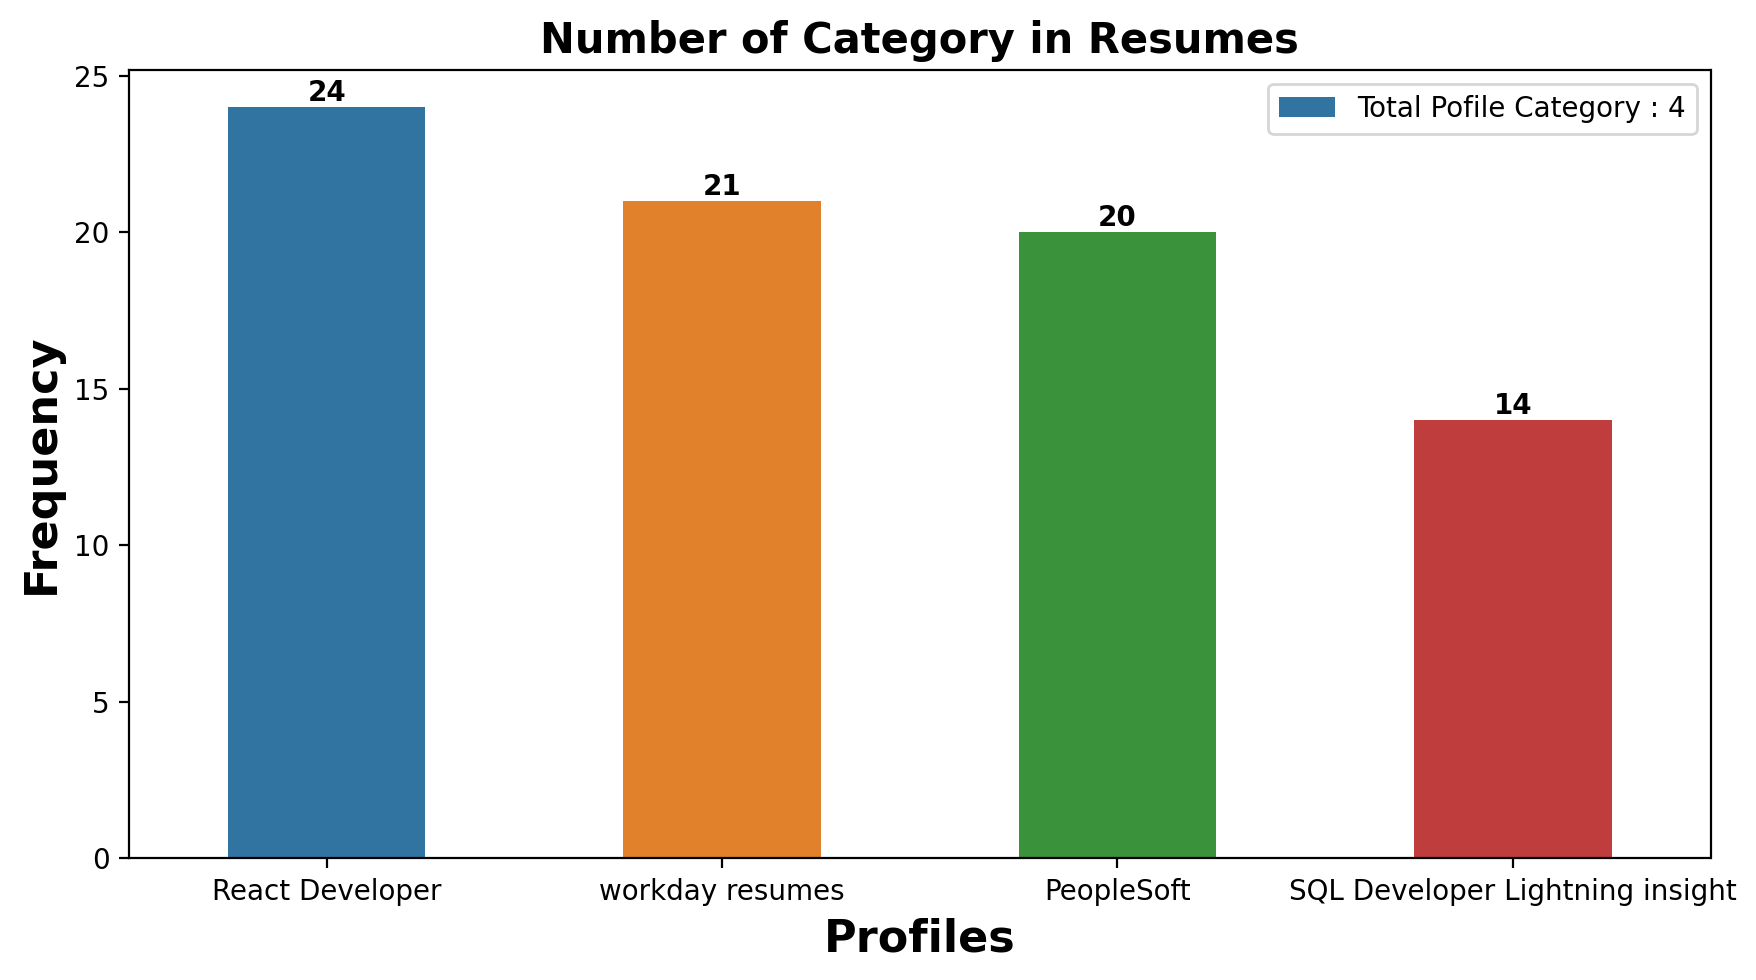

In [26]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Category.value_counts().index, y= resume_data.Category.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'medium')
plt.title('Number of Category in Resumes', fontsize= 15, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 10)

plt.tight_layout()

# **Percentage of Category by using pie graph**

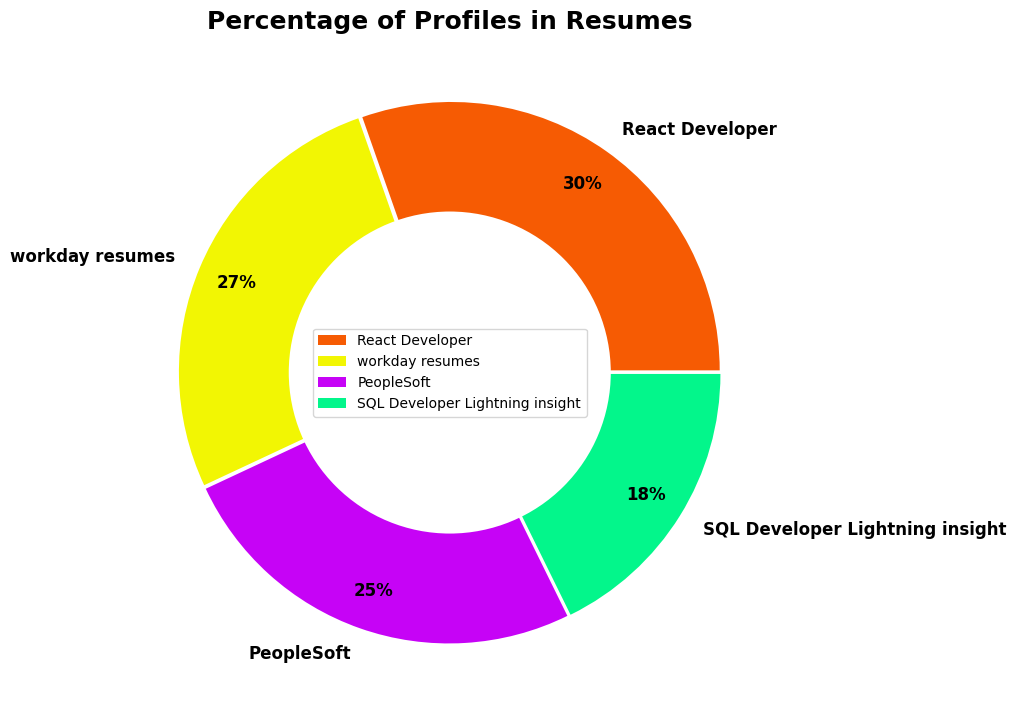

In [27]:
fig = plt.figure(figsize=(10,10),dpi=100)

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()


In [28]:
raw_data = resume_data["Raw_Details"][4]
raw_data

'G. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\nG. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\nProfile Summary:\t\t\t\t\t\t\t\t\t\t\n\n7+ years of experience in implementing, upgrading, and supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions and Portal IHUB\n\nExpertise in installation, configuration, setup, security and management of the PeopleSoft Internet Architecture PIA environment.\n\nIn-depth experience in analysis, planning, development, and implementation stages, including load testing, quality assurance, and tuning.\n\n\tGained extensive exposure in deploying PeopleSoft Environments.\n\n\tExperienced in Troubleshooting PeopleSoft Components.\n\nSkilled with the capability to analyse & interpret unique problems with a combination of training experience & logical thinking to find the right solutions\n\n\n\nCor

In [29]:
len(raw_data)

8394

# **Data Understanding**

In [30]:
resume_data

Raw_Details         Category
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft
1   Classification: Internal\n\nClassification: In...       PeopleSoft
2   Vinod Akkala                                  ...       PeopleSoft
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft
..                                                ...              ...
74  Shireesh Balasani                             ...  workday resumes
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes
76  Harikrishna Akula                             ...  workday resumes
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes

[79 rows x 2 columns]

# **Data points in which category is PeopleSoft **

In [31]:
resume_data["Category"].unique()

array(['PeopleSoft', 'React Developer', 'SQL Developer Lightning insight',
       'workday resumes'], dtype=object)

In [32]:
resume_data[resume_data.Category == "PeopleSoft"]

Raw_Details    Category
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft
1   Classification: Internal\n\nClassification: In...  PeopleSoft
2   Vinod Akkala                                  ...  PeopleSoft
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft
4   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft
5   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft
6   Personal Details\t\t\n\n\n\nName\n\nPritam Bis...  PeopleSoft
7   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
8   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
9   C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft
10  Rahul Ahuja\n\n-------------------------------...  PeopleSoft
11  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  PeopleSoft
12  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  PeopleSoft
13  Hari Narayana \t\t              \n\n\t\n\n\n\n...  PeopleSoft
14  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  PeopleSoft
15  R Ahmed                                       ...  PeopleSoft
16  PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...  PeopleSoft
17  PeopleSoft Database Administrator\n\n         ...  PeopleSoft
18  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  PeopleSoft
19  PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft

In [33]:
resume_data[resume_data.Category == "React Developer  `"]

Empty DataFrame
Columns: [Raw_Details, Category]
Index: []

In [34]:
resume_data[resume_data.Category == "SQL Developer Lightning insight"]

Raw_Details  \
44  BUDDHA VAMSI                                  ...   
45  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
46  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
47  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
48  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
49  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
50  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
51  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
52  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   
53  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
54  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
55  KAMBALLA PRADEEP                              ...   
56   Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
57  SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   

                           Category  
44  SQL Developer Lightning insight  
45  SQL Developer Lightning insight  
46  SQL Developer Lightning insight  
47  SQL Developer Lightning insight  
48  SQL Developer Lightning insight  
49  SQL Developer Lightning insight  
50  SQL Developer Lightning insight  
51  SQL Developer Lightning insight  
52  SQL Developer Lightning insight  
53  SQL Developer Lightning insight  
54  SQL Developer Lightning insight  
55  SQL Developer Lightning insight  
56  SQL Developer Lightning insight  
57  SQL Developer Lightning insight

In [35]:
resume_data[resume_data.Category == "workday resumes"]

Raw_Details         Category
58  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  workday resumes
59  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workday resumes
60  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  workday resumes
61  Mooraboyina Guravaiah\n\nWorkday Integration S...  workday resumes
62  G Himaja\n\n                                  ...  workday resumes
63  Srikanth (WORKDAY hCM Consultant)\t           ...  workday resumes
64  Workday HCM  Techno functional Consultant     ...  workday resumes
65  Punugoti Swetha\n\nWorkday Technical Consultan...  workday resumes
66  Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...  workday resumes
67  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  workday resumes
68  Workday Integration Consultant\n\n\n\nName    ...  workday resumes
69  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...  workday resumes
70  Vinay kumar .v\nWorkday Functional Consultant\...  workday resumes
71  Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...  workday resumes
72  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  workday resumes
73  Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...  workday resumes
74  Shireesh Balasani                             ...  workday resumes
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes
76  Harikrishna Akula                             ...  workday resumes
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes

In [36]:
resume_data["Category"].value_counts()

React Developer                    24
workday resumes                    21
PeopleSoft                         20
SQL Developer Lightning insight    14
Name: Category, dtype: int64

In [37]:
resume_data.isna().sum()

Raw_Details    0
Category       0
dtype: int64

<Axes: >

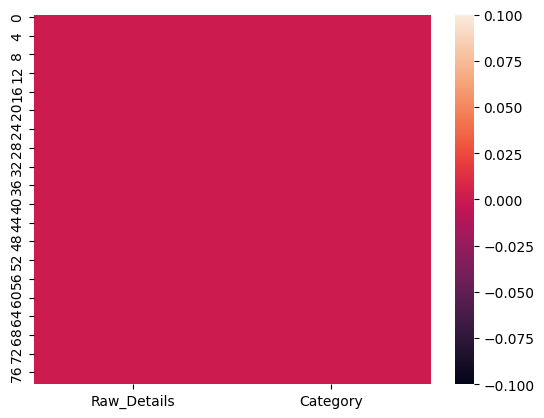

In [38]:
sns.heatmap(resume_data.isna())

# **Number Of Words In Each Resume**

In [39]:
resume_data["Words_counts"] = resume_data["Raw_Details"].apply(lambda x : len(str(x).split(" ")))
resume_data

Raw_Details         Category  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft   
1   Classification: Internal\n\nClassification: In...       PeopleSoft   
2   Vinod Akkala                                  ...       PeopleSoft   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft   
..                                                ...              ...   
74  Shireesh Balasani                             ...  workday resumes   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
76  Harikrishna Akula                             ...  workday resumes   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   

    Words_counts  
0            667  
1            558  
2           2034  
3           1641  
4           1451  
..           ...  
74          1945  
75           485  
76          1319  
77           746  
78           494  

[79 rows x 3 columns]

# **Number Of Characters in Each Resume**

In [40]:
resume_data["Char_Counts"] = resume_data["Raw_Details"].str.len() #including spaces
resume_data

Raw_Details         Category  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft   
1   Classification: Internal\n\nClassification: In...       PeopleSoft   
2   Vinod Akkala                                  ...       PeopleSoft   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft   
..                                                ...              ...   
74  Shireesh Balasani                             ...  workday resumes   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
76  Harikrishna Akula                             ...  workday resumes   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   

    Words_counts  Char_Counts  
0            667         5196  
1            558         4917  
2           2034        14379  
3           1641        11121  
4           1451         8394  
..           ...          ...  
74          1945        11610  
75           485         4761  
76          1319         7620  
77           746         4042  
78           494         4212  

[79 rows x 4 columns]

# **Number Of Stopwords In Each Resume**

In [41]:
stop = stopwords.words("english")
resume_data["Stopwords"] = resume_data["Raw_Details"].apply(lambda x : len([x for x in x.split() if x in stop]))
resume_data

Raw_Details         Category  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft   
1   Classification: Internal\n\nClassification: In...       PeopleSoft   
2   Vinod Akkala                                  ...       PeopleSoft   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft   
..                                                ...              ...   
74  Shireesh Balasani                             ...  workday resumes   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
76  Harikrishna Akula                             ...  workday resumes   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   

    Words_counts  Char_Counts  Stopwords  
0            667         5196        123  
1            558         4917        114  
2           2034        14379        356  
3           1641        11121        303  
4           1451         8394        186  
..           ...          ...        ...  
74          1945        11610        365  
75           485         4761        112  
76          1319         7620        221  
77           746         4042         96  
78           494         4212        100  

[79 rows x 5 columns]

# **Number of Numeric in each Resume**

In [42]:
resume_data["Numerics"] = resume_data["Raw_Details"].apply(lambda x : len([x for x in x.split() if x.isdigit()]))
resume_data

Raw_Details         Category  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft   
1   Classification: Internal\n\nClassification: In...       PeopleSoft   
2   Vinod Akkala                                  ...       PeopleSoft   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft   
..                                                ...              ...   
74  Shireesh Balasani                             ...  workday resumes   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
76  Harikrishna Akula                             ...  workday resumes   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   

    Words_counts  Char_Counts  Stopwords  Numerics  
0            667         5196        123         7  
1            558         4917        114         7  
2           2034        14379        356        18  
3           1641        11121        303        16  
4           1451         8394        186         6  
..           ...          ...        ...       ...  
74          1945        11610        365        16  
75           485         4761        112         8  
76          1319         7620        221         6  
77           746         4042         96         6  
78           494         4212        100         2  

[79 rows x 6 columns]

In [43]:
sns.histplot(resume_data["Numerics"])

<Axes: xlabel='Numerics', ylabel='Count'>

# Note :
# most of the data points having numeric value are in the range of 0 to 10

<Axes: xlabel='Char_Counts', ylabel='Count'>

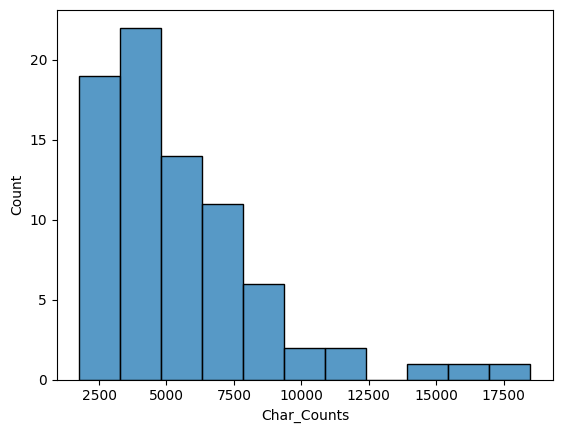

In [44]:
sns.histplot(resume_data['Char_Counts'])

# Note:
# most of the data points having char counts are in the range of 2500 to 10000

<Axes: xlabel='Stopwords', ylabel='Count'>

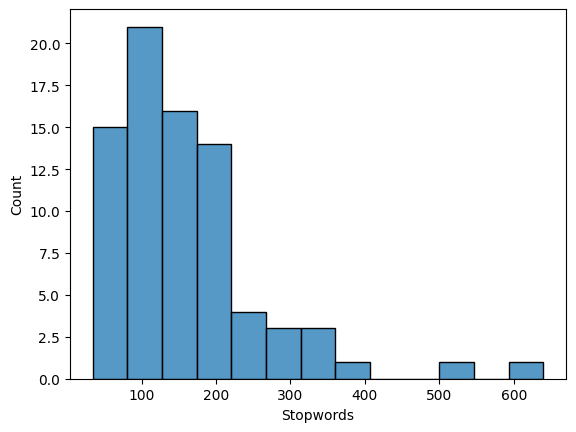

In [45]:
sns.histplot(resume_data["Stopwords"])

#note :
# most of the data points having stopwords are in the range of 50 to 200

<Axes: xlabel='Words_counts', ylabel='Count'>

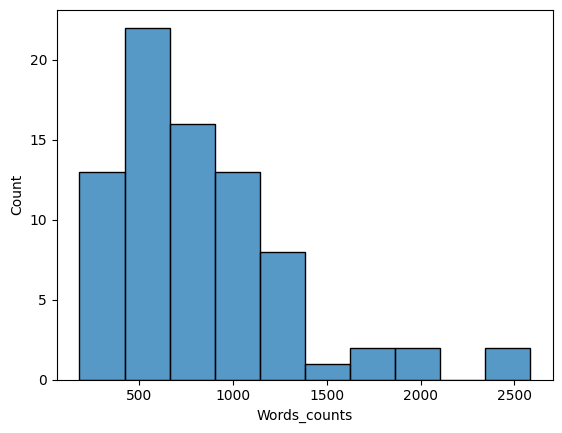

In [46]:
sns.histplot(resume_data["Words_counts"])

#note :
#most of the data points having words_counts are in the range of 250 to 1000

# **Text PreProcessing**

In [47]:
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=6b4014a8b9dcd7b4b5dd9377a1ae156284676bbca44568e8598c6733ad06e8c2
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [48]:
#import libraries for textpreprocessing
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from cleantext import clean

In [49]:
raw_data

'G. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\nG. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\nProfile Summary:\t\t\t\t\t\t\t\t\t\t\n\n7+ years of experience in implementing, upgrading, and supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions and Portal IHUB\n\nExpertise in installation, configuration, setup, security and management of the PeopleSoft Internet Architecture PIA environment.\n\nIn-depth experience in analysis, planning, development, and implementation stages, including load testing, quality assurance, and tuning.\n\n\tGained extensive exposure in deploying PeopleSoft Environments.\n\n\tExperienced in Troubleshooting PeopleSoft Components.\n\nSkilled with the capability to analyse & interpret unique problems with a combination of training experience & logical thinking to find the right solutions\n\n\n\nCor

# **Cleaning The data**

In [50]:
def preprocess(sentence):

    #convert into string
    sentence = str(sentence)

    # Convert the sentence to lowercase
    sentence = sentence.lower()

    # Remove "{html}"
    sentence = sentence.replace('{html}', '')

    # Remove HTML tags
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)

    # Remove web links (URLs)
    sentence = re.sub(r'http\S+', '', sentence)

    # Remove numbers
    sentence = re.sub(r'\d+', '', sentence)

    # Tokenize the sentence into words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)

    #remove stopwords and short words(length<=2)
    filtered_words  = [w for w in tokens if len(w) > 2 if w not in stopwords.words("english")]

    #return cleaned sentence as string
    return" ".join(filtered_words)

In [51]:
resume_data["Resume_details"] = resume_data.Raw_Details.apply(lambda x : preprocess(x))

In [52]:
resume_data

Raw_Details         Category  \
0   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...       PeopleSoft   
1   Classification: Internal\n\nClassification: In...       PeopleSoft   
2   Vinod Akkala                                  ...       PeopleSoft   
3   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...       PeopleSoft   
4   G. Ananda Rayudu \n\n\t\t       https://www.li...       PeopleSoft   
..                                                ...              ...   
74  Shireesh Balasani                             ...  workday resumes   
75  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
76  Harikrishna Akula                             ...  workday resumes   
77  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday resumes   
78  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   

    Words_counts  Char_Counts  Stopwords  Numerics  \
0            667         5196        123         7   
1            558         4917        114         7   
2           2034        14379        356        18   
3           1641        11121        303        16   
4           1451         8394        186         6   
..           ...          ...        ...       ...   
74          1945        11610        365        16   
75           485         4761        112         8   
76          1319         7620        221         6   
77           746         4042         96         6   
78           494         4212        100         2   

                                       Resume_details  
0   priyanka ramadoss mountpleasant coonoor nilgir...  
1   classification internal classification interna...  
2   vinod akkala peoplesoft dba admin professional...  
3   peoplesoft admin peoplesoft dba ganesh alladi ...  
4   ananda rayudu ananda rayudu profile summary ye...  
..                                                ...  
74  shireesh balasani hcm consultant profile summa...  
75  jyoti verma professional summary professional ...  
76  harikrishna akula summary years experience aro...  
77  hima mendu career objective continue growing k...  
78  venkata saikrishna workday consultant profssio...  

[79 rows x 7 columns]

# **Droping columns**

In [53]:
resume_data.drop(columns = ["Raw_Details","Words_counts","Char_Counts","Stopwords","Numerics"],inplace=True)

In [54]:
resume_data

Category                                     Resume_details
0        PeopleSoft  priyanka ramadoss mountpleasant coonoor nilgir...
1        PeopleSoft  classification internal classification interna...
2        PeopleSoft  vinod akkala peoplesoft dba admin professional...
3        PeopleSoft  peoplesoft admin peoplesoft dba ganesh alladi ...
4        PeopleSoft  ananda rayudu ananda rayudu profile summary ye...
..              ...                                                ...
74  workday resumes  shireesh balasani hcm consultant profile summa...
75  workday resumes  jyoti verma professional summary professional ...
76  workday resumes  harikrishna akula summary years experience aro...
77  workday resumes  hima mendu career objective continue growing k...
78  workday resumes  venkata saikrishna workday consultant profssio...

[79 rows x 2 columns]

In [55]:
resume_data["Resume_details"][1]

'classification internal classification internal murali experience summary years experience working peoplesoft administration performing various infrastructure related activities peoplesoft environments installed configured peoplesoft web server application server database server process scheduler server windows unix linux platforms creating domains web server application server process scheduler server applied patches manually applied maintenance packs change assistant tool experience dpks installations applying tax updates fixes using pum migrating projects one environment another environment using application designer also capi stat tools performed single sign sso implementation experience running compare reports pre post migrations experience setting client workstation developers testers involved configuration integration broker setting modules sending messages involved production support client involved running audit reports dddaudit sysaudit integrity checks experience configurat

In [56]:
#we need to do this
pd.set_option("display.max_colwidth",None)

In [57]:
resume_data

Category  \
0        PeopleSoft   
1        PeopleSoft   
2        PeopleSoft   
3        PeopleSoft   
4        PeopleSoft   
..              ...   
74  workday resumes   
75  workday resumes   
76  workday resumes   
77  workday resumes   
78  workday resumes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# **Named Entity Recognition(NER)**

In [58]:
resume_data.columns

Index(['Category', 'Resume_details'], dtype='object')

In [59]:
txt = " ".join(resume_data["Resume_details"])
txt

'priyanka ramadoss mountpleasant coonoor nilgiris career objective excel software professional working learning challenging environment utilize skills knowledge diligence dedication ensure maximum contribution growth organization work profile summary adept professional years september present experience peoplesoft admin accenture professional summary peoplesoft administrator september present experience peoplesoft administration finance application proficient creating configuring peoplesoft components like web server application server process schedulers active monitoring non production databases applications knowledgeable peoplesoft migrations using application designer data mover taking compare reports also moving codes dev test production environments usage ppm tool well perform peoplesoft migrations compare report generation full life cycle installation peoplesoft environments pre post database refresh activities change package creation applying bug fixes using change assistant peo

In [60]:
len(txt)

329236

# **en_core_web_sm Model For NER**

In [61]:
from spacy import displacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")


In [62]:
displacy.render(nlp(txt),style = "ent",jupyter = True )

# **WordCloud**

In [63]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Most Frequent Words')

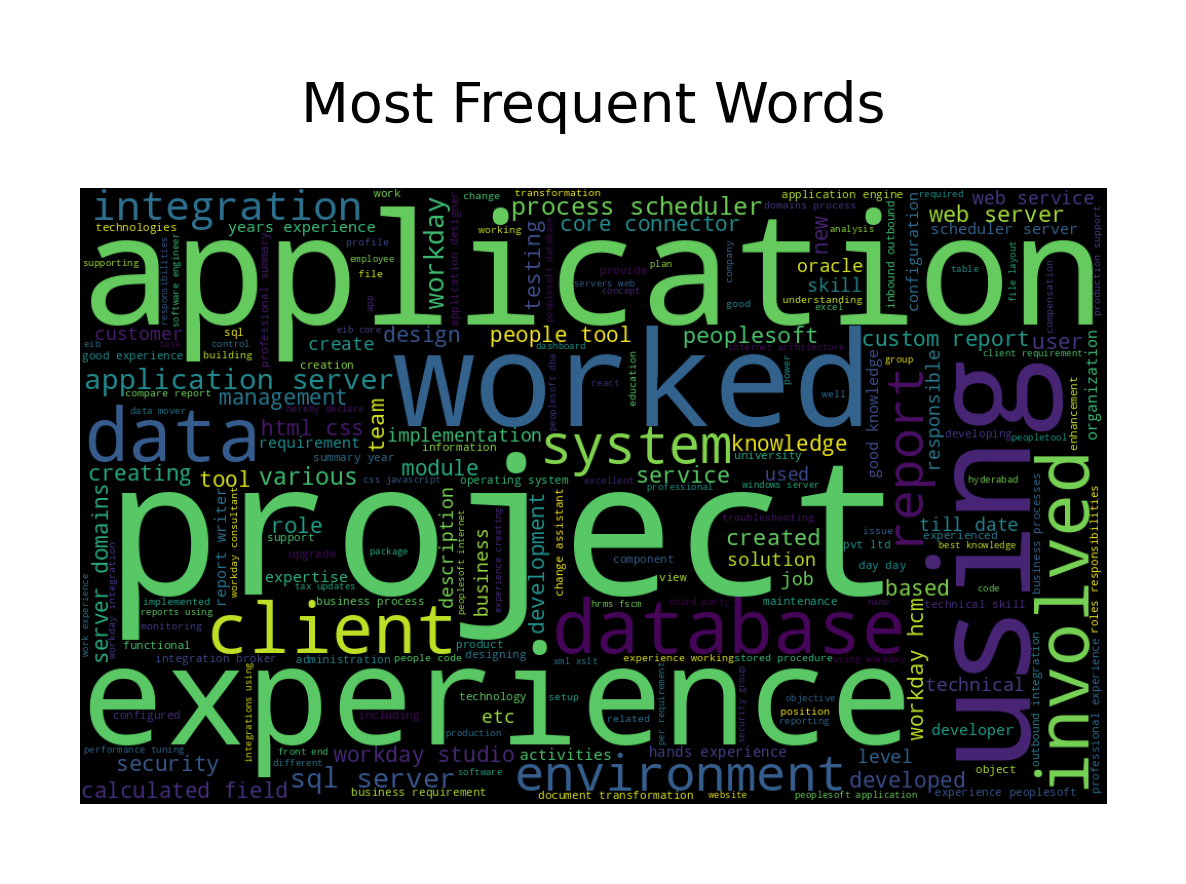

In [64]:
wc = WordCloud(background_color = "Black",height = 600,width = 1000).generate(txt)
plt.figure(figsize=(2,1),dpi = 800)
plt.imshow(wc)
plt.axis("off")
plt.title("Most Frequent Words",size =5)

In [65]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [66]:
# Step 1: Initialize a list to store important words
totalWords = []

# Assuming 'resume_data' contains the resume details

# Step 2: Loop through each resume text
for resume_text in resume_data['Resume_details'].values:

# Step 2a: Tokenize the text into individual words
    requiredWords = nltk.word_tokenize(resume_text)

# Step 2b: Filter out stopwords and punctuation, and store important words
    for word in requiredWords:
      totalWords.append(word)
# Step 3: Count occurrences of each word
wordfreqdist = nltk.FreqDist(totalWords)

# Step 4: Find the 50 most common words
mostcommon = wordfreqdist.most_common(50)

# Step 5: Print the most common words
print(mostcommon)


[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('role', 142), ('oracle', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


In [67]:
mstcmn_25 = pd.DataFrame(mostcommon[0:25])
mstcmn_25 = mstcmn_25.rename(columns = {0:"Words",1:"Counts"})
mstcmn_25

Words  Counts
0     experience     600
1     peoplesoft     453
2        workday     432
3    application     418
4          using     395
5         server     360
6           data     332
7        project     327
8        reports     326
9            sql     281
10      business     273
11           web     251
12      database     243
13       process     236
14        worked     220
15     knowledge     216
16        client     197
17        system     192
18      involved     191
19         tools     190
20  integrations     189
21   integration     183
22           hcm     182
23          like     180
24       support     178

# **Visualizing Top 25 Most Frequent Words**

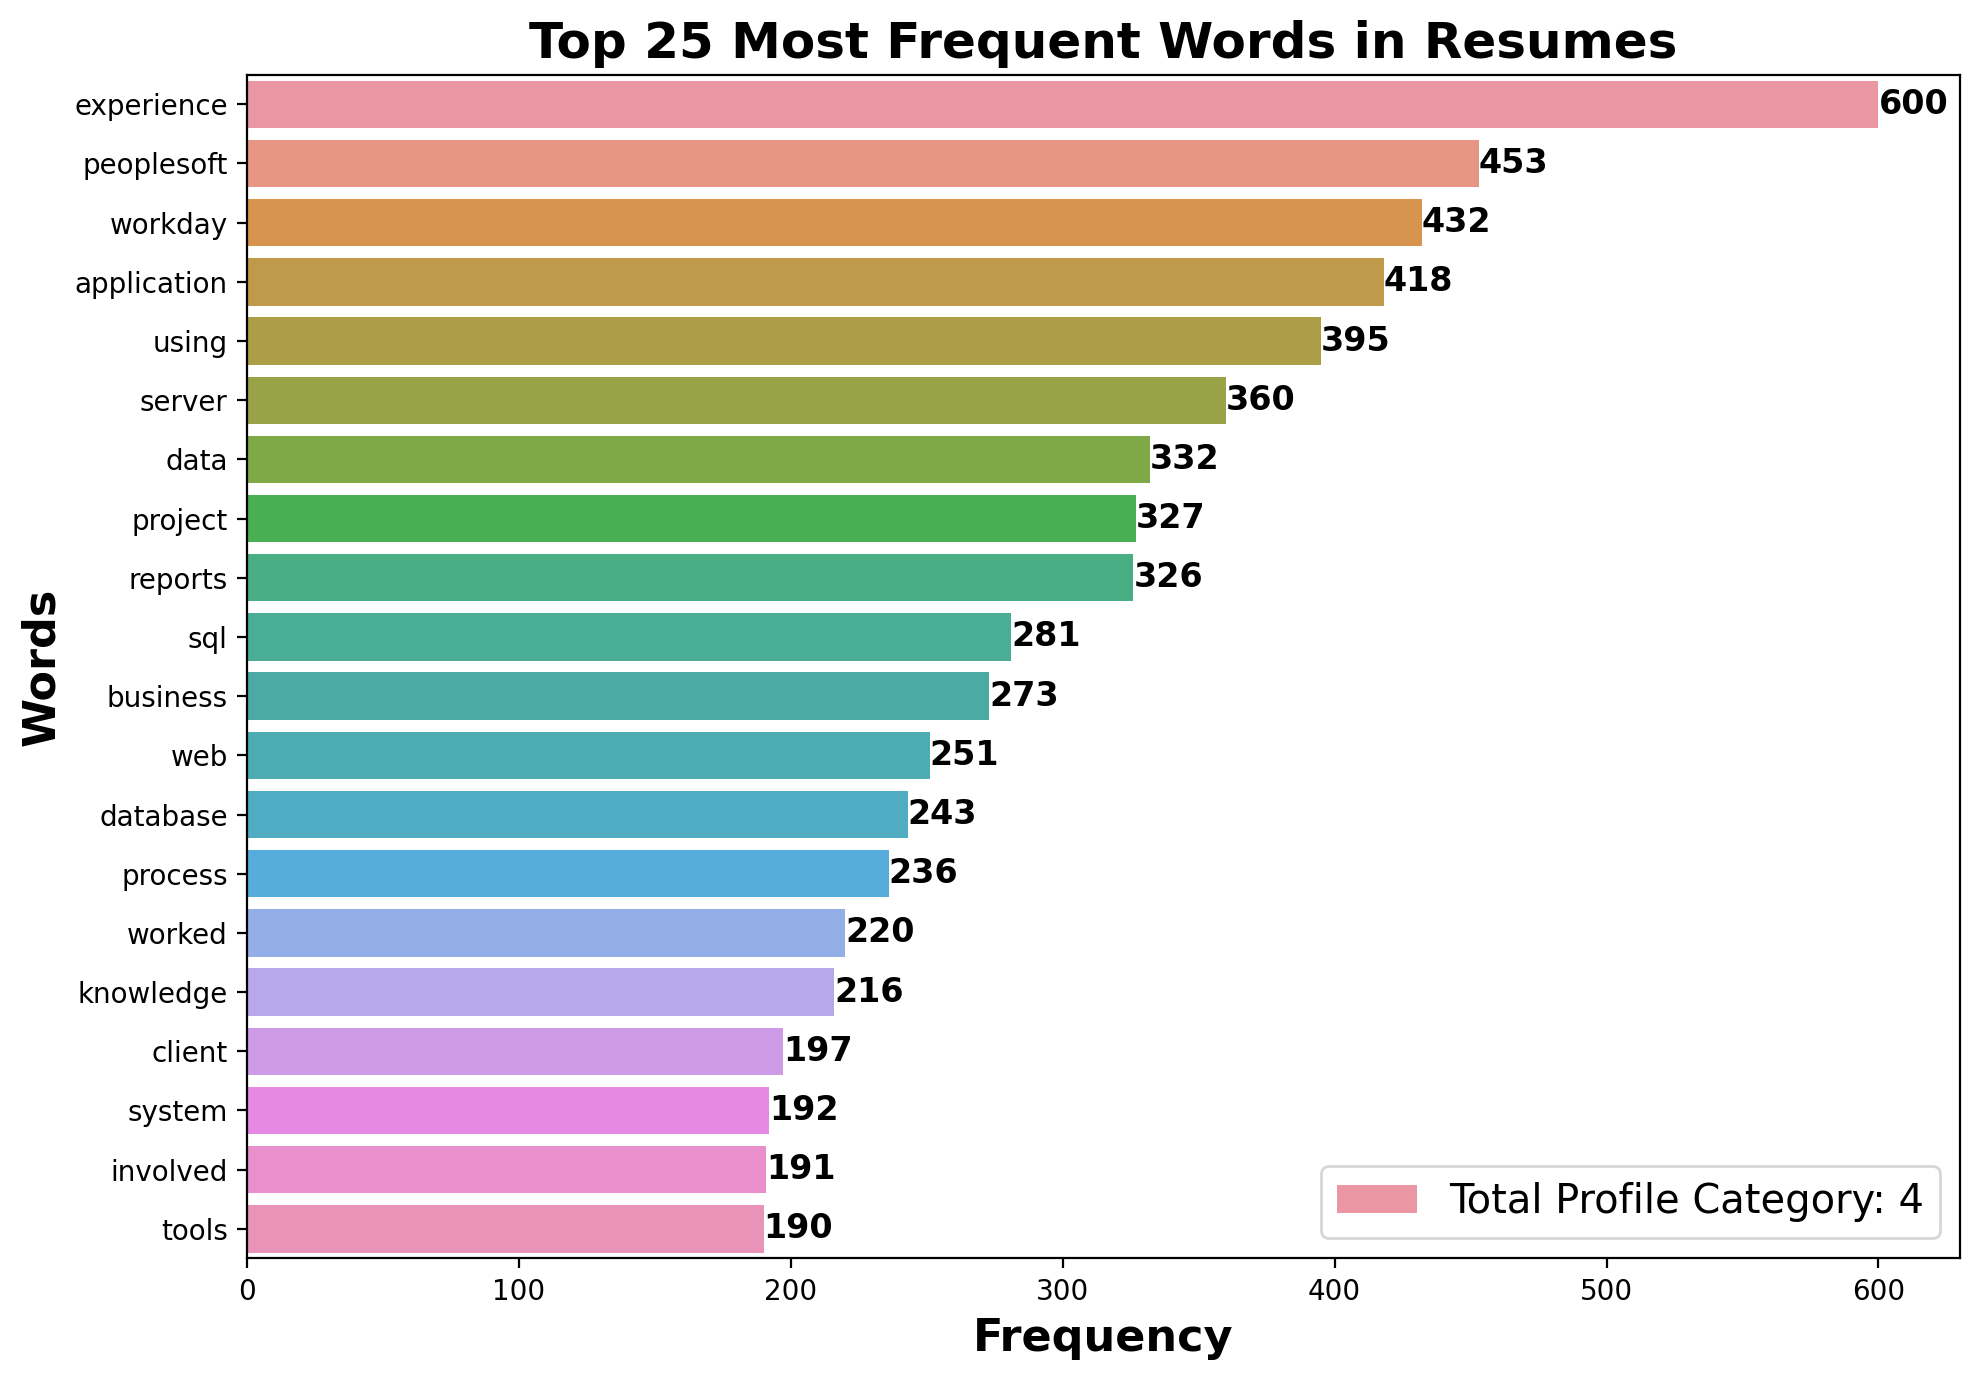

In [68]:
# Assuming 'wd_df' contains word frequencies and words, and 'resume_data' contains resume details

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=200)

# Create the bar plot
sns.barplot(x=mstcmn_25['Counts'].head(20), y=mstcmn_25['Words'].head(20), data=mstcmn_25, ax=ax,
            label='Total Profile Category: {}'.format(len(resume_data['Category'].unique())))

# Customize the plot
ax.set_xlabel('Frequency', size=16, fontweight='bold')
ax.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Top 25 Most Frequent Words in Resumes', fontsize=18, fontweight='bold')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


from the above WordCloud we found that

Project,

Experience,

Application.

Work, and so on

are the most frequent words in our Resume dataset  

# **Comparession Between Stemming and Lemmatization**

Stemming = Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

Lemmatization = Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.



#Difference Between **Stemming** And **Lemmatization**

1650689035153.png

# **Stemming**

In [69]:
stem = PorterStemmer()

In [70]:
resume_data

Category  \
0        PeopleSoft   
1        PeopleSoft   
2        PeopleSoft   
3        PeopleSoft   
4        PeopleSoft   
..              ...   
74  workday resumes   
75  workday resumes   
76  workday resumes   
77  workday resumes   
78  workday resumes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [71]:
Resume_details =resume_data["Resume_details"]

In [72]:
Resume_details

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [73]:
len(Resume_details)

79

In [74]:
stem_words = []

for i in Resume_details:
  word = word_tokenize(i)
  for i in word:
    if i not in stopwords.words("english"):
      stem_words.append(stem.stem(i))

In [75]:
stem_words

['priyanka',
 'ramadoss',
 'mountpleas',
 'coonoor',
 'nilgiri',
 'career',
 'object',
 'excel',
 'softwar',
 'profession',
 'work',
 'learn',
 'challeng',
 'environ',
 'util',
 'skill',
 'knowledg',
 'dilig',
 'dedic',
 'ensur',
 'maximum',
 'contribut',
 'growth',
 'organ',
 'work',
 'profil',
 'summari',
 'adept',
 'profession',
 'year',
 'septemb',
 'present',
 'experi',
 'peoplesoft',
 'admin',
 'accentur',
 'profession',
 'summari',
 'peoplesoft',
 'administr',
 'septemb',
 'present',
 'experi',
 'peoplesoft',
 'administr',
 'financ',
 'applic',
 'profici',
 'creat',
 'configur',
 'peoplesoft',
 'compon',
 'like',
 'web',
 'server',
 'applic',
 'server',
 'process',
 'schedul',
 'activ',
 'monitor',
 'non',
 'product',
 'databas',
 'applic',
 'knowledg',
 'peoplesoft',
 'migrat',
 'use',
 'applic',
 'design',
 'data',
 'mover',
 'take',
 'compar',
 'report',
 'also',
 'move',
 'code',
 'dev',
 'test',
 'product',
 'environ',
 'usag',
 'ppm',
 'tool',
 'well',
 'perform',
 'people

In [76]:
len(txt)

329236

In [77]:
len(stem_words)

40348

In [78]:
Stem_Words = pd.DataFrame(stem_words)
Stem_Words

0
0        priyanka
1        ramadoss
2      mountpleas
3         coonoor
4         nilgiri
...           ...
40343     mention
40344        true
40345        best
40346    knowledg
40347   hyderabad

[40348 rows x 1 columns]

In [79]:
Stem_Words.nunique()

0    3216
dtype: int64

# **Lemmatization**

In [80]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [81]:
lemma = WordNetLemmatizer()

In [82]:
lemma_words = []
for i in Resume_details:
  word = word_tokenize(i)
  for i in word:
    if i not in stopwords.words("english"):
      lemma_words.append(lemma.lemmatize(i))

In [83]:
lemma_words

['priyanka',
 'ramadoss',
 'mountpleasant',
 'coonoor',
 'nilgiris',
 'career',
 'objective',
 'excel',
 'software',
 'professional',
 'working',
 'learning',
 'challenging',
 'environment',
 'utilize',
 'skill',
 'knowledge',
 'diligence',
 'dedication',
 'ensure',
 'maximum',
 'contribution',
 'growth',
 'organization',
 'work',
 'profile',
 'summary',
 'adept',
 'professional',
 'year',
 'september',
 'present',
 'experience',
 'peoplesoft',
 'admin',
 'accenture',
 'professional',
 'summary',
 'peoplesoft',
 'administrator',
 'september',
 'present',
 'experience',
 'peoplesoft',
 'administration',
 'finance',
 'application',
 'proficient',
 'creating',
 'configuring',
 'peoplesoft',
 'component',
 'like',
 'web',
 'server',
 'application',
 'server',
 'process',
 'scheduler',
 'active',
 'monitoring',
 'non',
 'production',
 'database',
 'application',
 'knowledgeable',
 'peoplesoft',
 'migration',
 'using',
 'application',
 'designer',
 'data',
 'mover',
 'taking',
 'compare',
 '

In [84]:
Lemma_Words = pd.DataFrame(lemma_words)
Lemma_Words

0
0           priyanka
1           ramadoss
2      mountpleasant
3            coonoor
4           nilgiris
...              ...
40343      mentioned
40344           true
40345           best
40346      knowledge
40347      hyderabad

[40348 rows x 1 columns]

In [85]:
Lemma_Words.nunique()

0    3987
dtype: int64

# Comparession Between Stemming And **Lemmatization**

In [86]:
stem_50 = stem_words[0:50]
stem_50

['priyanka',
 'ramadoss',
 'mountpleas',
 'coonoor',
 'nilgiri',
 'career',
 'object',
 'excel',
 'softwar',
 'profession',
 'work',
 'learn',
 'challeng',
 'environ',
 'util',
 'skill',
 'knowledg',
 'dilig',
 'dedic',
 'ensur',
 'maximum',
 'contribut',
 'growth',
 'organ',
 'work',
 'profil',
 'summari',
 'adept',
 'profession',
 'year',
 'septemb',
 'present',
 'experi',
 'peoplesoft',
 'admin',
 'accentur',
 'profession',
 'summari',
 'peoplesoft',
 'administr',
 'septemb',
 'present',
 'experi',
 'peoplesoft',
 'administr',
 'financ',
 'applic',
 'profici',
 'creat',
 'configur']

In [87]:
lemma_50 = lemma_words[0:50]
lemma_50

['priyanka',
 'ramadoss',
 'mountpleasant',
 'coonoor',
 'nilgiris',
 'career',
 'objective',
 'excel',
 'software',
 'professional',
 'working',
 'learning',
 'challenging',
 'environment',
 'utilize',
 'skill',
 'knowledge',
 'diligence',
 'dedication',
 'ensure',
 'maximum',
 'contribution',
 'growth',
 'organization',
 'work',
 'profile',
 'summary',
 'adept',
 'professional',
 'year',
 'september',
 'present',
 'experience',
 'peoplesoft',
 'admin',
 'accenture',
 'professional',
 'summary',
 'peoplesoft',
 'administrator',
 'september',
 'present',
 'experience',
 'peoplesoft',
 'administration',
 'finance',
 'application',
 'proficient',
 'creating',
 'configuring']

In [88]:
data = {"Stemming":stem_50,"Lemmatization":lemma_50 }

In [89]:
comp = pd.DataFrame(data)
comp

Stemming   Lemmatization
0     priyanka        priyanka
1     ramadoss        ramadoss
2   mountpleas   mountpleasant
3      coonoor         coonoor
4      nilgiri        nilgiris
5       career          career
6       object       objective
7        excel           excel
8      softwar        software
9   profession    professional
10        work         working
11       learn        learning
12    challeng     challenging
13     environ     environment
14        util         utilize
15       skill           skill
16    knowledg       knowledge
17       dilig       diligence
18       dedic      dedication
19       ensur          ensure
20     maximum         maximum
21   contribut    contribution
22      growth          growth
23       organ    organization
24        work            work
25      profil         profile
26     summari         summary
27       adept           adept
28  profession    professional
29        year            year
30     septemb       september
31     present         present
32      experi      experience
33  peoplesoft      peoplesoft
34       admin           admin
35    accentur       accenture
36  profession    professional
37     summari         summary
38  peoplesoft      peoplesoft
39   administr   administrator
40     septemb       september
41     present         present
42      experi      experience
43  peoplesoft      peoplesoft
44   administr  administration
45      financ         finance
46      applic     application
47     profici      proficient
48       creat        creating
49    configur     configuring

# **Feature Extraction**

# **There are Three Feature Extraction Technique**

1. Binary Weight

2. Bag Of Words

3. TF-IDF


# **1.Binary Weight**

In [90]:
cv = CountVectorizer(binary = True)
x = cv.fit_transform(resume_data["Resume_details"])
x

<79x4437 sparse matrix of type '<class 'numpy.int64'>'
	with 20122 stored elements in Compressed Sparse Row format>

In [91]:
x.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
cv.vocabulary_

{'priyanka': 3027,
 'ramadoss': 3175,
 'mountpleasant': 2502,
 'coonoor': 868,
 'nilgiris': 2601,
 'career': 555,
 'objective': 2636,
 'excel': 1381,
 'software': 3666,
 'professional': 3051,
 'working': 4389,
 'learning': 2187,
 'challenging': 617,
 'environment': 1337,
 'utilize': 4196,
 'skills': 3643,
 'knowledge': 2140,
 'diligence': 1131,
 'dedication': 1021,
 'ensure': 1324,
 'maximum': 2383,
 'contribution': 847,
 'growth': 1707,
 'organization': 2718,
 'work': 4378,
 'profile': 3057,
 'summary': 3853,
 'adept': 65,
 'years': 4420,
 'september': 3539,
 'present': 2992,
 'experience': 1408,
 'peoplesoft': 2845,
 'admin': 70,
 'accenture': 12,
 'administrator': 77,
 'administration': 75,
 'finance': 1505,
 'application': 215,
 'proficient': 3056,
 'creating': 912,
 'configuring': 791,
 'components': 756,
 'like': 2220,
 'web': 4330,
 'server': 3544,
 'process': 3035,
 'schedulers': 3469,
 'active': 48,
 'monitoring': 2482,
 'non': 2608,
 'production': 3046,
 'databases': 981,
 'a

In [93]:
pd.DataFrame(x.toarray(),columns = cv.get_feature_names_out())

abdul  abilities  ability  able  abreast  abs  absence  absent  abstract  \
0       0          1        0     0        0    0        0       0         0   
1       0          0        0     0        0    0        0       0         0   
2       0          0        0     0        0    0        0       0         0   
3       0          0        0     0        0    0        0       0         0   
4       0          0        0     0        0    0        0       0         0   
..    ...        ...      ...   ...      ...  ...      ...     ...       ...   
74      0          0        1     0        0    0        1       0         0   
75      0          0        1     0        0    0        0       0         0   
76      0          0        0     0        0    0        0       0         0   
77      0          0        1     0        0    0        0       0         0   
78      0          0        0     0        0    0        0       0         0   

    abstraction  ...  york  young  yrs  zealand  zenefits  zero  zerozilla  \
0             0  ...     0      0    0        0         0     0          0   
1             0  ...     0      0    0        0         0     0          0   
2             0  ...     0      0    0        0         0     0          0   
3             0  ...     0      0    0        0         0     0          0   
4             0  ...     0      0    0        0         0     0          0   
..          ...  ...   ...    ...  ...      ...       ...   ...        ...   
74            0  ...     0      0    0        0         1     0          0   
75            0  ...     0      0    0        0         0     0          0   
76            0  ...     0      0    0        0         0     0          0   
77            0  ...     0      0    0        0         0     0          0   
78            0  ...     0      0    0        0         0     0          0   

    zones  ﬁnding  ﬁts  
0       0       0    0  
1       0       0    0  
2       0       0    0  
3       0       0    0  
4       0       0    0  
..    ...     ...  ...  
74      0       0    0  
75      0       0    0  
76      0       0    0  
77      0       0    0  
78      0       0    0  

[79 rows x 4437 columns]

In [94]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        79 non-null     object
 1   Resume_details  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [95]:
resume_data["Category"].value_counts()

React Developer                    24
workday resumes                    21
PeopleSoft                         20
SQL Developer Lightning insight    14
Name: Category, dtype: int64

# **Encoding column Category By using Map Function**

In [96]:
resume_data["Label"] = resume_data["Category"].map({"PeopleSoft":0,"React Developer":1,"SQL Developer Lightning insight":2,"workday resumes":3})

In [97]:
y = resume_data["Label"]
y

0     0
1     0
2     0
3     0
4     0
     ..
74    3
75    3
76    3
77    3
78    3
Name: Label, Length: 79, dtype: int64

# **Model Building By using Binary Weight**

In [98]:
x = x.toarray()

# **Splitting The Data**

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)

# **Creating User Define Function For Accuracy**

In [100]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))


# **1.Naive Bayes**

In [101]:
from sklearn.naive_bayes import MultinomialNB
prediction(MultinomialNB())

Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



# **2.Decision Tree**

In [102]:
from sklearn.tree import DecisionTreeClassifier
prediction(DecisionTreeClassifier(criterion="entropy"))

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **3.Logestic Regression**

In [103]:
from sklearn.linear_model import LogisticRegression
prediction(LogisticRegression())

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **4.XGBClassifier**

In [104]:
from xgboost import XGBClassifier
prediction(XGBClassifier())


Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.92        16
weighted avg       0.96      0.94      0.94        16



# **5.KNeighborsClassifier**

In [105]:
from sklearn.neighbors import KNeighborsClassifier
prediction(KNeighborsClassifier())

Train Accuracy: 0.873015873015873
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.90        16
weighted avg       0.95      0.94      0.93        16



# 6.**Random Forest**

In [106]:
from sklearn.ensemble import RandomForestClassifier
prediction(RandomForestClassifier(max_depth = 6))

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **7.SVM**

In [107]:
from sklearn.svm import SVC
prediction(SVC())

Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16



# **2.Bag Of Words**

In [108]:
cv = CountVectorizer()
x = cv.fit_transform(resume_data["Resume_details"])
x.toarray()


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
cv.vocabulary_

{'priyanka': 3027,
 'ramadoss': 3175,
 'mountpleasant': 2502,
 'coonoor': 868,
 'nilgiris': 2601,
 'career': 555,
 'objective': 2636,
 'excel': 1381,
 'software': 3666,
 'professional': 3051,
 'working': 4389,
 'learning': 2187,
 'challenging': 617,
 'environment': 1337,
 'utilize': 4196,
 'skills': 3643,
 'knowledge': 2140,
 'diligence': 1131,
 'dedication': 1021,
 'ensure': 1324,
 'maximum': 2383,
 'contribution': 847,
 'growth': 1707,
 'organization': 2718,
 'work': 4378,
 'profile': 3057,
 'summary': 3853,
 'adept': 65,
 'years': 4420,
 'september': 3539,
 'present': 2992,
 'experience': 1408,
 'peoplesoft': 2845,
 'admin': 70,
 'accenture': 12,
 'administrator': 77,
 'administration': 75,
 'finance': 1505,
 'application': 215,
 'proficient': 3056,
 'creating': 912,
 'configuring': 791,
 'components': 756,
 'like': 2220,
 'web': 4330,
 'server': 3544,
 'process': 3035,
 'schedulers': 3469,
 'active': 48,
 'monitoring': 2482,
 'non': 2608,
 'production': 3046,
 'databases': 981,
 'a

In [110]:
pd.DataFrame(x.toarray(),columns = cv.get_feature_names_out())

abdul  abilities  ability  able  abreast  abs  absence  absent  abstract  \
0       0          1        0     0        0    0        0       0         0   
1       0          0        0     0        0    0        0       0         0   
2       0          0        0     0        0    0        0       0         0   
3       0          0        0     0        0    0        0       0         0   
4       0          0        0     0        0    0        0       0         0   
..    ...        ...      ...   ...      ...  ...      ...     ...       ...   
74      0          0        1     0        0    0        3       0         0   
75      0          0        1     0        0    0        0       0         0   
76      0          0        0     0        0    0        0       0         0   
77      0          0        1     0        0    0        0       0         0   
78      0          0        0     0        0    0        0       0         0   

    abstraction  ...  york  young  yrs  zealand  zenefits  zero  zerozilla  \
0             0  ...     0      0    0        0         0     0          0   
1             0  ...     0      0    0        0         0     0          0   
2             0  ...     0      0    0        0         0     0          0   
3             0  ...     0      0    0        0         0     0          0   
4             0  ...     0      0    0        0         0     0          0   
..          ...  ...   ...    ...  ...      ...       ...   ...        ...   
74            0  ...     0      0    0        0         3     0          0   
75            0  ...     0      0    0        0         0     0          0   
76            0  ...     0      0    0        0         0     0          0   
77            0  ...     0      0    0        0         0     0          0   
78            0  ...     0      0    0        0         0     0          0   

    zones  ﬁnding  ﬁts  
0       0       0    0  
1       0       0    0  
2       0       0    0  
3       0       0    0  
4       0       0    0  
..    ...     ...  ...  
74      0       0    0  
75      0       0    0  
76      0       0    0  
77      0       0    0  
78      0       0    0  

[79 rows x 4437 columns]

# **Model Building Using Bag Of words**

In [111]:
x

<79x4437 sparse matrix of type '<class 'numpy.int64'>'
	with 20122 stored elements in Compressed Sparse Row format>

In [112]:
y

0     0
1     0
2     0
3     0
4     0
     ..
74    3
75    3
76    3
77    3
78    3
Name: Label, Length: 79, dtype: int64

# **1.Naive Bayes**

In [113]:
prediction(MultinomialNB())

Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



# **2.Decision Tree**

In [114]:
prediction(DecisionTreeClassifier())

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **3.LogisticRegression**

In [115]:
prediction(LogisticRegression())

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **4.XGBClassifier**

In [116]:
prediction(XGBClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.92        16
weighted avg       0.96      0.94      0.94        16



# **5.KNeighborsClassifier**

In [117]:
prediction(KNeighborsClassifier())

Train Accuracy: 0.873015873015873
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.90        16
weighted avg       0.95      0.94      0.93        16



# **6.RandomForest**

In [118]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# **7.SVM**

In [119]:
prediction(SVC())

Train Accuracy: 1.0
Test Accuracy: 0.9375
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16



# **3.TF-IDF**

In [120]:
tf = TfidfVectorizer()
x = tf.fit_transform(resume_data["Resume_details"])
x.toarray()

array([[0.        , 0.04066567, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02828093, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
pd.DataFrame(x.toarray(),columns = tf.get_feature_names_out())

abdul  abilities   ability  able  abreast  abs  absence  absent  abstract  \
0     0.0   0.040666  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
1     0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
2     0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
3     0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
4     0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
..    ...        ...       ...   ...      ...  ...      ...     ...       ...   
74    0.0   0.000000  0.013211   0.0      0.0  0.0  0.05504     0.0       0.0   
75    0.0   0.000000  0.021842   0.0      0.0  0.0  0.00000     0.0       0.0   
76    0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   
77    0.0   0.000000  0.028281   0.0      0.0  0.0  0.00000     0.0       0.0   
78    0.0   0.000000  0.000000   0.0      0.0  0.0  0.00000     0.0       0.0   

    abstraction  ...  york  young  yrs  zealand  zenefits  zero  zerozilla  \
0           0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
1           0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
2           0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
3           0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
4           0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
..          ...  ...   ...    ...  ...      ...       ...   ...        ...   
74          0.0  ...   0.0    0.0  0.0      0.0  0.089081   0.0        0.0   
75          0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
76          0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
77          0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   
78          0.0  ...   0.0    0.0  0.0      0.0  0.000000   0.0        0.0   

    zones  ﬁnding  ﬁts  
0     0.0     0.0  0.0  
1     0.0     0.0  0.0  
2     0.0     0.0  0.0  
3     0.0     0.0  0.0  
4     0.0     0.0  0.0  
..    ...     ...  ...  
74    0.0     0.0  0.0  
75    0.0     0.0  0.0  
76    0.0     0.0  0.0  
77    0.0     0.0  0.0  
78    0.0     0.0  0.0  

[79 rows x 4437 columns]

In [122]:
y

0     0
1     0
2     0
3     0
4     0
     ..
74    3
75    3
76    3
77    3
78    3
Name: Label, Length: 79, dtype: int64

# **splitting the data**

In [123]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [138]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,accuracy_score

# **1.Naive Bayes**

In [173]:
NB = MultinomialNB()
NB.fit(xtrain, ytrain)
y_pred = NB.predict(xtest)
print(f"Train Accuracy: {NB.score(xtrain,ytrain)}")
print(f"Test Accuracy: {NB.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = NB.score(xtest, ytest)
precision_NB = precision_score(ytest,y_pred,average = 'macro')
recall_NB = recall_score(ytest,y_pred, average = 'macro')
f1_NB = f1_score(ytest,y_pred, average = 'macro')
accuracy_NB = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# **2.Decision Tree**

In [214]:
DT = DecisionTreeClassifier(criterion="gini",max_depth = 4)
DT.fit(xtrain, ytrain)
y_pred = DT.predict(xtest)
print(f"Train Accuracy: {DT.score(xtrain,ytrain)}")
print(f"Test Accuracy: {DT.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = DT.score(xtest, ytest)
precision_DT = precision_score(ytest,y_pred,average = 'macro')
recall_DT = recall_score(ytest,y_pred, average = 'macro')
f1_DT = f1_score(ytest,y_pred, average = 'macro')
accuracy_DT = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.92      0.96      0.93        20
weighted avg       0.97      0.95      0.95        20



# **3.LogisticRegression**

In [191]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
y_pred = LR.predict(xtest)
print(f"Train Accuracy: {LR.score(xtrain,ytrain)}")
print(f"Test Accuracy: {LR.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = LR.score(xtest, ytest)
precision_LR = precision_score(ytest,y_pred,average = 'macro')
recall_LR= recall_score(ytest,y_pred, average = 'macro')
f1_LR = f1_score(ytest,y_pred, average = 'macro')
accuracy_LR = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# **4.XGBClassifier**

In [196]:
XGB = XGBClassifier()
XGB.fit(xtrain, ytrain)
y_pred = XGB.predict(xtest)
print(f"Train Accuracy: {XGB.score(xtrain,ytrain)}")
print(f"Test Accuracy: {XGB.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
XGB_score = XGB.score(xtest, ytest)
precision_XGB = precision_score(ytest,y_pred,average = 'macro')
recall_XGB = recall_score(ytest,y_pred, average = 'macro')
f1_XGB = f1_score(ytest,y_pred, average = 'macro')
accuracy_XGB = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# **5.KNeighborsClassifier**

In [198]:
KNN = KNeighborsClassifier()
KNN.fit(xtrain, ytrain)
y_pred = KNN.predict(xtest)
print(f"Train Accuracy: {KNN.score(xtrain,ytrain)}")
print(f"Test Accuracy: {KNN.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
KNN_score = KNN.score(xtest, ytest)
precision_KNN = precision_score(ytest,y_pred,average = 'macro')
recall_KNN = recall_score(ytest,y_pred, average = 'macro')
f1_KNN = f1_score(ytest,y_pred, average = 'macro')
accuracy_KNN = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.89      0.94         9
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.94      0.97      0.95        20
weighted avg       0.96      0.95      0.95        20



# **6.Random Forest**

In [205]:
RF = RandomForestClassifier(max_depth = 4)
RF.fit(xtrain, ytrain)
y_pred = RF.predict(xtest)
print(f"Train Accuracy: {RF.score(xtrain,ytrain)}")
print(f"Test Accuracy: {RF.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
RF_score = RF.score(xtest, ytest)
precision_RF = precision_score(ytest,y_pred,average = 'macro')
recall_RF = recall_score(ytest,y_pred, average = 'macro')
f1_RF = f1_score(ytest,y_pred, average = 'macro')
accuracy_RF = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# **7.SVM**

In [208]:
SVM = SVC()
SVM.fit(xtrain, ytrain)
y_pred = SVM.predict(xtest)
print(f"Train Accuracy: {SVM.score(xtrain,ytrain)}")
print(f"Test Accuracy: {SVM.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
SVM_score = SVM.score(xtest, ytest)
precision_SVM = precision_score(ytest,y_pred,average = 'macro')
recall_SVM = recall_score(ytest,y_pred, average = 'macro')
f1_SVM = f1_score(ytest,y_pred, average = 'macro')
accuracy_SVM = accuracy_score(ytest,y_pred)

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Model Evaluation

In [215]:
Evaluation = {"Models":["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"
                        ],\
            "Train_Accuracy(%)":[NB.score(xtrain, ytrain),DT.score(xtrain, ytrain),LR.score(xtrain, ytrain),XGB.score(xtrain, ytrain),KNN.score(xtrain, ytrain),
                                 RF.score(xtrain, ytrain),SVM.score(xtrain, ytrain)],\
            "Test_Accuracy(%)":[accuracy_NB,accuracy_DT,accuracy_LR,accuracy_XGB,accuracy_KNN,accuracy_RF,accuracy_SVM],\
            "Precision(%)":[precision_NB,precision_DT,precision_LR,precision_XGB,precision_KNN,precision_RF,precision_SVM],\
            "Recall(%)":[recall_NB,recall_DT,recall_LR,recall_XGB,recall_KNN,recall_RF,recall_SVM],\
            "F1-Score(%)":[f1_NB,f1_DT,f1_LR,f1_XGB,f1_KNN,f1_RF,f1_SVM]}
table = pd.DataFrame(Evaluation)
table

Models  Train_Accuracy(%)  Test_Accuracy(%)  Precision(%)  \
0   Naive Bayes Classifier                1.0              1.00      1.000000   
1  DecisionTree Classifier                1.0              0.95      0.916667   
2      Logistic Regression                1.0              1.00      1.000000   
3            XGBClassifier                1.0              1.00      1.000000   
4           KNN Classifier                1.0              0.95      0.937500   
5  RandomForest Classifier                1.0              1.00      1.000000   
6           SVM Classifier                1.0              1.00      1.000000   

   Recall(%)  F1-Score(%)  
0   1.000000     1.000000  
1   0.958333     0.927273  
2   1.000000     1.000000  
3   1.000000     1.000000  
4   0.972222     0.949580  
5   1.000000     1.000000  
6   1.000000     1.000000

In [218]:
model_names = ["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"]
Train_accuracies = [NB.score(xtrain, ytrain),DT.score(xtrain, ytrain),LR.score(xtrain, ytrain),XGB.score(xtrain, ytrain),KNN.score(xtrain, ytrain),
                                 RF.score(xtrain, ytrain),SVM.score(xtrain, ytrain)]
Test_accuracies = [accuracy_NB,accuracy_DT,accuracy_LR,accuracy_XGB,accuracy_KNN,accuracy_RF,accuracy_SVM]

# **Graphical Representation**

In [229]:
rcParams = {'xtick.labelsize':'10','ytick.labelsize':'12','axes.labelsize':'14'}
fig, axe = plt.subplots(1,1, figsize=(10,5), dpi=500)
x_pos = np.arange(len(table))
model_names = ["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "Green")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 14, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 14, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
